In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

# Importo librerias de Scikit Learn
Puntualmente nos interesa importar el modelo de Regresion Lineal, la medida de error cuadratico medio, y el divisor de datos entre train y test.

In [2]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from sklearn.model_selection import GridSearchCV

# Importo dataset de Airbnb 
Desde Airbnb obtenemos el siguiente dataset para entrenar nuestros modelos de regresion http://insideairbnb.com/get-the-data.html (dataset "listings.csv" de London). 

Objetivo: Vamos a querer predecir el precio dadas ciertas features.

In [3]:
pwd

'D:\\Google Drive\\FACULTAD\\2020\\CIENCIA DE DATOS\\Clase05\\clusterai_2020-master\\clusterai_2020-master\\clases\\clase_05'

In [4]:
# importo el dataset de Airbnb London, lo guardamos en el dataframe "london".
london = pd.read_csv(r"D:\Google Drive\FACULTAD\2020\CIENCIA DE DATOS\Clase05\clusterai_2020-master\clusterai_2020-master\datasets\airbnb\clusterai_regresion_dataset_airbnb_london.csv", delimiter=',', parse_dates = True)

In [5]:
# observo la cantidad de renglones y columnas del dataset importado
np.shape(london)

(75213, 16)

In [6]:
# exploro las columnas que tiene el dataframe importado
london.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [7]:
#visualizo los primeros 3 renglones de mi dataset
london.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,9554,"Cozy, 3 minutes to Piccadilly Line",31655,Guy,NaN,Haringey,51.587767,-0.105666,Private room,35,1,131,2018-08-03,1.71,4,262
1,11076,The Sanctuary,40471,Rosa,NaN,Ealing,51.515645,-0.314508,Private room,70,2,2,2016-11-23,0.07,6,62
2,13913,Holiday London DB Room Let-on going,54730,Alina,NaN,Islington,51.568017,-0.111208,Private room,45,1,14,2018-06-17,0.14,2,364


In [8]:
# cuento cuantos NaNs tengo por columna
london.isnull().sum()

id                                    0
name                                 31
host_id                               0
host_name                            13
neighbourhood_group               75213
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       20353
reviews_per_month                 20357
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [9]:
# elimino las rows que tienen NaNs en la columna "reviews_per_month" , que otras opciones existen?
london = london.dropna(subset = ["reviews_per_month"])

In [10]:
# reviso como queda mi dataframe luego de eliminar los renglones con NaNs en review per month
london.shape

(54856, 16)

## Visualización rápida de las features de interes con Pairplot (Seaborn)

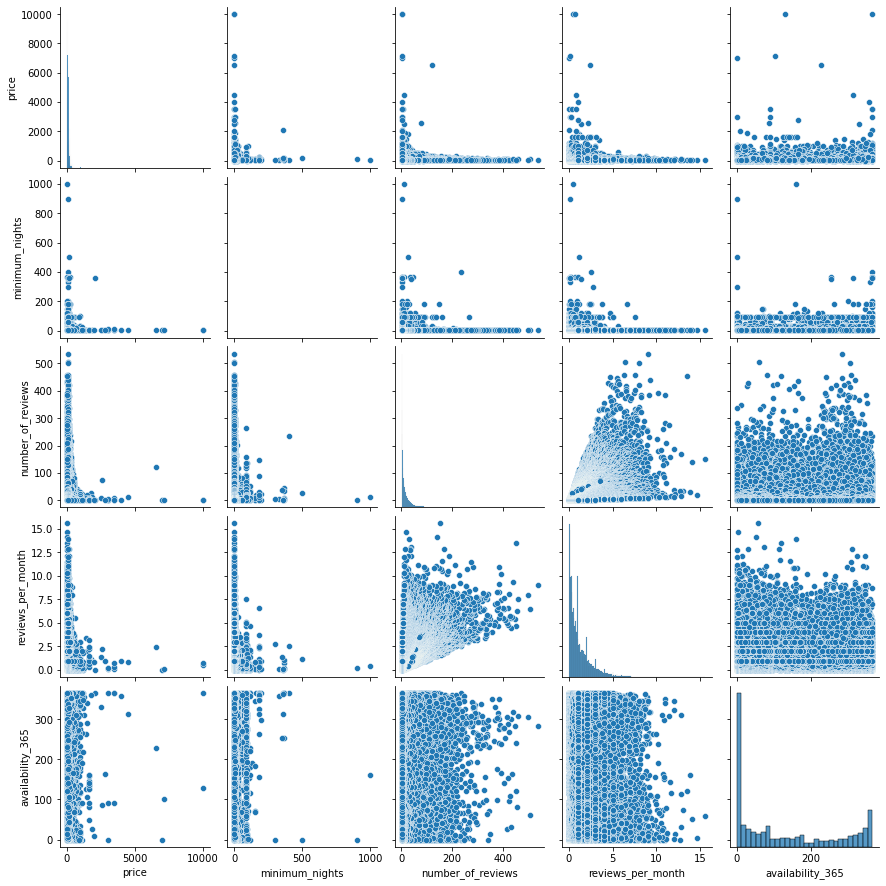

In [11]:
sns.pairplot(london[["price", "minimum_nights", "number_of_reviews", "reviews_per_month", "availability_365"]])
plt.show()

## Elimino con .drop las columnas que no son de interes

In [12]:
london = london.drop(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'last_review', 'latitude', 'longitude'], axis=1)
#Que features que eliminamos podrian llegar a ser utiles?

Link util -->
https://medium.com/@khadijamahanga/using-latitude-and-longitude-data-in-my-machine-learning-problem-541e2651e08c

In [13]:
london.head(3)

,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Haringey,Private room,35,1,131,1.71,4,262
1,Ealing,Private room,70,2,2,0.07,6,62
2,Islington,Private room,45,1,14,0.14,2,364


## Reviso si los valores máximos de cada feature se condicen con el contexto

Con que objetivo queremos ver esta informacion?

In [14]:
np.max(london)

neighbourhood                     Westminster
room_type                         Shared room
price                                   10000
minimum_nights                           1000
number_of_reviews                         536
reviews_per_month                       15.56
calculated_host_listings_count           1034
availability_365                          365
dtype: object

## Obtengo los percentiles 97 de price y Minimum nights para filtrar outliers de estas features

In [15]:
price_q97 = london.price.quantile(0.975)
print("el cuantil 0.97 de la feature 'price' es = " + str(price_q97))

el cuantil 0.97 de la feature 'price' es = 300.0


In [16]:
min_nights_q97 = london.minimum_nights.quantile(0.975)
print("el cuantil 0.97 de la feature 'minimum_nights' es = " + str(min_nights_q97))

el cuantil 0.97 de la feature 'minimum_nights' es = 14.0


## Outlier Filtering: Filtro mi dataset por los percentiles calculados en el paso anterior bajo las features correspondientes

In [17]:
# aca filtro y conservo los valores que cumplen las dos condiciones al mismo tiempo
london_filt = london.loc[(london.price < price_q97) & (london.minimum_nights < min_nights_q97)]

In [18]:
london_filt.shape

(51827, 8)

In [19]:
london_filt.head(3)

,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Haringey,Private room,35,1,131,1.71,4,262
1,Ealing,Private room,70,2,2,0.07,6,62
2,Islington,Private room,45,1,14,0.14,2,364


## Feature Engineering: Genero variables dummies para las features categoricas (Neighbourhood y Room Type)

In [20]:
# dummies para la feature "neighbourhood"
neighs_dummie = pd.get_dummies(london_filt.neighbourhood)
neighs_dummie.head(3)

,Barking and Dagenham,Barnet,Bexley,Brent,Bromley,Camden,City of London,Croydon,Ealing,Enfield,...,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
neighs_dummie.shape

(51827, 33)

In [22]:
# Ejemplo de dummies para la feature "room_type"
room_dummie = pd.get_dummies(london_filt.room_type)
room_dummie.head(3)

,Entire home/apt,Private room,Shared room
0,0,1,0
1,0,1,0
2,0,1,0


In [23]:
room_dummie.shape

(51827, 3)

## Agrego las nuevas variables dummies creadas al dataframe de trabajo 'london_filt'

In [24]:
london_filt = london_filt.join([neighs_dummie, room_dummie])

In [25]:
london_filt.head(3)

,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Barking and Dagenham,Barnet,...,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster,Entire home/apt,Private room,Shared room
0,Haringey,Private room,35,1,131,1.71,4,262,0,0,...,0,0,0,0,0,0,0,0,1,0
1,Ealing,Private room,70,2,2,0.07,6,62,0,0,...,0,0,0,0,0,0,0,0,1,0
2,Islington,Private room,45,1,14,0.14,2,364,0,0,...,0,0,0,0,0,0,0,0,1,0


In [26]:
print("La cantidad de features nuevas agregadas a dataframe son = " + str(np.shape(neighs_dummie)[1]+np.shape(room_dummie)[1]))

La cantidad de features nuevas agregadas a dataframe son = 36


## Creamos nuestra variable dependiente (label - etiqueta) y

In [27]:
y = np.array(london_filt[["price"]])

## Creamos nuestra variable Independiente X quitando las features que no deseamos

In [28]:
x = london_filt.drop(['price', 'neighbourhood','room_type'], axis=1)

In [29]:
np.shape(x)

(51827, 41)

## Divido el dataset entre Train y Test

In [30]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.90, random_state=42)

In [31]:
xtrain.head()

,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Barking and Dagenham,Barnet,Bexley,Brent,Bromley,...,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster,Entire home/apt,Private room,Shared room
4109,3,10,0.61,1,321,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8703,1,2,0.05,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
62456,4,1,0.94,1,137,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7200,2,2,0.18,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
44756,1,3,0.25,1,220,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [32]:
xtrain.shape

(5182, 41)

In [33]:
# Step 4: auto scaling train- set (mean = 0, std = 1)
scaler = preprocessing.StandardScaler().fit(xtrain)
scaler

StandardScaler()

In [34]:
# auto scalo mis muestras de train utilizando el scaler fiteado con el xtrain
xtrain_scal = scaler.transform(xtrain)  

In [35]:
# auto scalo mis muestras de test utilizando el scaler fiteado con el xtrain
xtest_scal = scaler.transform(xtest)  

# Creo un modelo de Regresión Lineal

In [36]:
# 1) creo un modelo generico de regresion lineal
lr = LinearRegression()

In [37]:
# 2) Ajusto el modelo de regresion lineal utilizando el set de train, tanto las features X como las samples Y
lr.fit(xtrain_scal, ytrain)

LinearRegression()

In [38]:
# 3) Obtengo las predicciones que realiza mi modelo con las muestras de test, sin mostrarle las labels (Ytest)
# las predicciones las guardo en el vector "ypred"
ypred = lr.predict(xtest_scal)

In [39]:
np.shape(ypred)

(46645, 1)

In [40]:
# calculo el error de mi modelo con las muestras de train = error de train
np.sqrt(mean_squared_error(ytest, ypred))

39.299588589114684

In [41]:
mean_squared_error(ytest, ypred)

1544.457663273673

In [42]:
from sklearn.metrics import mean_absolute_error

In [43]:
mean_absolute_error(ytest, ypred)

28.085250295268555

![Inner join](https://i.imgflip.com/1vgxmu.jpg)

## Armar tres modelos de regresion usando:

    -KNN Regression
    Utilizar un GridSearchCV: como base podes utilizar los siguientes parametros
    parameters_k = np.arange(20,31,5)
    parameters_knn = [{'n_neighbors': parameters_k}]
    
    https://scikit-learn.org/stable/auto_examples/neighbors/plot_regression.html?highlight=knn
    
    -SVR
    Utilizar un GridSearchCV: como base podes utilizar los siguientes parametros:
    ​parameters_svr_rbf = [{'kernel':['rbf'] , 'C': [1,100],'gamma': [0.1,0.5] }]
    
    -Random Forest regressor
    Utilizar un GridSearchCV: como base podes utilizar los siguientes parametros:
    'n_estimators': [100, 200, 300, 1000]
    
    https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor.set_params

### Comparar el R2, RMSE, MAE

Competencia

Mayor R2 = { }

Menor RMSE = { }

Menor MAE = { }

### KNN REGRESSION

In [44]:
from sklearn.neighbors import KNeighborsRegressor

In [45]:
#Parametros Pre-Definidos:
parameters_k = np.arange(20,31,5)
parameters_knn = [{'n_neighbors': parameters_k}]
#print (param_grid)
knn = KNeighborsRegressor()

n_folds = 5
grid = GridSearchCV(knn, param_grid=parameters_knn,refit=True,
                  cv=n_folds, scoring="neg_mean_squared_error",
                  verbose=3, n_jobs=3)


In [46]:
grid.fit(xtrain_scal, ytrain)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  15 out of  15 | elapsed:    9.6s finished


GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=3,
             param_grid=[{'n_neighbors': array([20, 25, 30])}],
             scoring='neg_mean_squared_error', verbose=3)

In [49]:
print (f'Best Score: {grid.best_score_}')
print (f'Best params: {grid.best_params_}')
print (f'Best Estimator: {grid.best_estimator_}')

Best Score: -1633.0440172967944
Best params: {'n_neighbors': 20}
Best Estimator: KNeighborsRegressor(n_neighbors=20)


In [50]:
yhat=grid.predict(xtest_scal)

In [51]:
kkn_prediction = grid.best_estimator_.predict(xtest_scal)
Optimalknn_r2 = r2_score(ytest, yhat)
Optimalknn_mse = mean_squared_error(ytest, yhat)
Optimalknn_mae = mean_absolute_error(ytest, yhat)

In [52]:
KN=grid.best_estimator_


In [53]:
print(f'  With optimal {KN}, r2: {Optimalknn_r2}')
print(f'  With optimal {KN} , MSE: {Optimalknn_mse}')
print(f'  With optimal {KN}, MSE: {Optimalknn_mae}')

  With optimal KNeighborsRegressor(n_neighbors=20), r2: 0.49343204328146584
  With optimal KNeighborsRegressor(n_neighbors=20) , MSE: 1586.6006127130454
  With optimal KNeighborsRegressor(n_neighbors=20), MSE: 28.06733840711759


Curiosidad : K optima?

In [54]:
# LLeva tiempo
acc = []
from sklearn import metrics
for i in range(1,21):
    neigh = KNeighborsRegressor(n_neighbors = i).fit(xtrain_scal, ytrain)
    yhat = neigh.predict(xtest_scal)
    acc.append(mean_absolute_error(ytest, yhat))

Min Mae: 28.06733840711759 at K = 19


Text(0, 0.5, 'Mae')

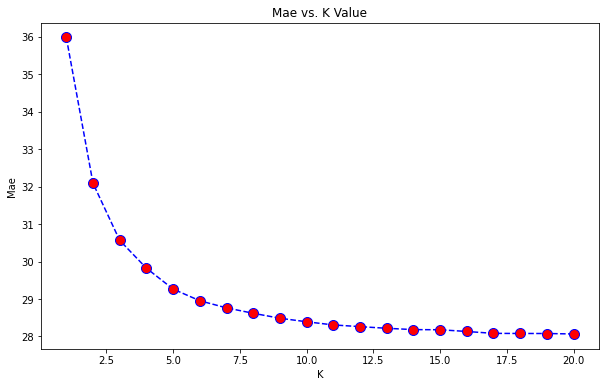

In [55]:
## Grafico MEA vs. K
print("Min Mae:",min(acc),"at K =",acc.index(min(acc)))
plt.figure(figsize=(10,6))
plt.plot(range(1,21),acc,color = 'blue',linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Mae vs. K Value')
plt.xlabel('K')
plt.ylabel('Mae')

# SVR

In [56]:
#Parametros Pre-Definidos:
est = SVR(max_iter=25000)
parameters = [{'kernel':['rbf'] , 'C': [1,100],'gamma': [0.1,0.5] }]
n_folds = 5
gridsvr = GridSearchCV(est, param_grid=parameters,refit=True,
                  cv=n_folds, scoring="neg_mean_squared_error",
                  verbose=3, n_jobs=3)

In [57]:
#Entreno el modelo
gridsvr.fit(xtrain_scal, ytrain)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  20 out of  20 | elapsed:   20.5s finished
D:\Miniconda\envs\cd\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GridSearchCV(cv=5, estimator=SVR(max_iter=25000), n_jobs=3,
             param_grid=[{'C': [1, 100], 'gamma': [0.1, 0.5],
                          'kernel': ['rbf']}],
             scoring='neg_mean_squared_error', verbose=3)

In [58]:
print (f'Best Score: {gridsvr.best_score_}')
print (f'Best params: {gridsvr.best_params_}')
print (f'Best Estimator: {gridsvr.best_estimator_}')

Best Score: -1680.886555843345
Best params: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
Best Estimator: SVR(C=100, gamma=0.1, max_iter=25000)


In [59]:
yhat=gridsvr.predict(xtest_scal)

In [60]:
SVR_prediction = gridsvr.best_estimator_.predict(xtest_scal)
OptimalSVR_r2 = r2_score(ytest, yhat)
OptimalSVR_mse = mean_squared_error(ytest, yhat)
OptimalSVR_mae = mean_absolute_error(ytest, yhat)

In [61]:
print(f'r2: {OptimalSVR_r2}')
print(f'MSE: {OptimalSVR_mse}')
print(f'MAE: {OptimalSVR_mae}')

r2: 0.4796776491625605
MSE: 1629.6801834737307
MAE: 27.19362211041141


## Random Forest

In [62]:
from sklearn.ensemble import RandomForestRegressor
#Parametros Pre-Definidos:
RF=RandomForestRegressor()
n_folds=5
parameters={'n_estimators': [100, 200, 300, 1000]}
gridRF = GridSearchCV(RF, param_grid=parameters,refit=True,
                  cv=n_folds, scoring="neg_mean_squared_error",
                  verbose=3, n_jobs=3)


In [63]:
gridRF.fit(xtrain_scal, ytrain)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  20 out of  20 | elapsed:  1.5min finished
D:\Miniconda\envs\cd\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=3,
             param_grid={'n_estimators': [100, 200, 300, 1000]},
             scoring='neg_mean_squared_error', verbose=3)

In [64]:
print (f'Best Score: {gridRF.best_score_}')
print (f'Best params: {gridRF.best_params_}')
print (f'Best Estimator: {gridRF.best_estimator_}')

Best Score: -1597.667365346198
Best params: {'n_estimators': 100}
Best Estimator: RandomForestRegressor()


In [65]:
yhat=gridRF.predict(xtest_scal)

In [66]:
RF_prediction = gridRF.best_estimator_.predict(xtest_scal)
OptimalRF_r2 = r2_score(ytest, yhat)
OptimalRF_mse = mean_squared_error(ytest, yhat)
OptimalRF_mae = mean_absolute_error(ytest, yhat)

In [67]:
print(f'r2: {OptimalRF_r2}')
print(f'MSE: {OptimalRF_mse}')
print(f'MAE: {OptimalRF_mae}')

r2: 0.4845327063949283
MSE: 1614.473858878052
MAE: 28.258823842238442
